# Data Project - Stock Market Analysis 

Welcome to your second data project! In this portfolio project we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method!

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks' closing prices?
    4.) What was the correlation between different stocks' daily returns?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior?

---
#### NOTE: This notebook was build using Python3 while doing the course exercise. The original noteboook is in Python2.

##### Since the original course publication some of the libraries have seen their behaviour modified, especially Searborn. Throughout the notebook I've tried to highlight where the code differs from the original in order to produce the same outputs or even when there's no similar output now, choosing a similar one instead.

##### Also, a major difference is how the data is obtained. In the original course, the data is downloaded directly from Yahoo using Pandas' IO DataReader. Since then, not only Pandas IO was moved but also some data sources became either unstable or unavailable. As such, I downloaded the data for the time periods directly from Yahoo in csv format and updated the notebook to read from the files.
---

#### Basic Analysis of Stock Information

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [1]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# NOTE: for some statiscal calculations we will also import the stats from scipy
from scipy import stats

# Note: Pandas data ready is not a seperate package. The original was pandas.io.data
import pandas_datareader.data as pdweb

# For time stamps
from datetime import datetime

In [2]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# I've downloaded these in csv format instead of using the API call which is now deprecacted.
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = pd.read_csv("data/" + stock + ".csv")
    # Note: Since we now do not get the dates as a DatetimeIndex in the Dataframe then we need to get the Date column and
    #        convert it to index, and then we also need to drop the column. This will allow us to follow more closely the course exercise
    globals()[stock].set_index(pd.DatetimeIndex(globals()[stock]["Date"]), inplace=True)
    globals()[stock].drop("Date", axis=1, inplace=True)

Quick note: using globals() is a sloppy way of setting teh Dataframes names, but its simple

Let's go ahead and play around with the AAPL dataframe to get a feel for the data

In [3]:
# NOTE: this is a bit different from the original notebook, which just describes the AAPL stock data. I want to have a glimpse at all four.
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,103.279144,104.181604,102.319700,103.268634,96.403442,5.782832e+07
std,14.539267,14.685578,14.259951,14.445970,14.454927,2.404937e+07
min,74.007141,74.441429,73.047142,73.994286,66.172997,1.447960e+07
25%,93.842503,94.584999,93.119997,93.820000,87.297237,4.266905e+07
50%,101.239998,102.154999,100.535000,101.039997,94.482918,5.325340e+07
75%,113.535000,114.400000,112.010002,113.302499,106.409044,6.799198e+07
max,132.940002,133.600006,131.169998,133.000000,125.401093,1.899779e+08


In [4]:
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,547.472846,551.565964,542.135900,546.975260,546.975260,1.938463e+06
std,24.459745,23.998856,24.807727,24.370983,24.370983,9.381570e+05
min,491.942810,493.261566,484.891632,489.854309,489.854309,1.475000e+05
25%,528.103714,532.941619,523.620270,528.334335,528.334335,1.383950e+06
50%,546.891662,550.690765,540.875976,545.951843,545.951843,1.703700e+06
75%,568.496613,573.534455,563.134217,568.278366,568.278366,2.206000e+06
max,596.708984,601.522522,589.259949,592.820374,592.820374,6.828200e+06


In [5]:
MSFT.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,43.891270,44.231310,43.526865,43.903214,40.083756,3.328167e+07
std,2.836821,2.863737,2.817083,2.834516,2.735061,1.799630e+07
min,39.000000,39.349998,38.509998,39.060001,35.181862,1.143780e+07
25%,41.437499,41.762501,41.125001,41.507498,37.840289,2.462620e+07
50%,43.674999,44.094999,43.340000,43.855000,40.095501,2.997050e+07
75%,46.380001,46.762500,46.014998,46.417500,42.464073,3.638602e+07
max,49.740002,50.049999,49.389999,49.610001,45.280670,2.025224e+08


In [6]:
AMZN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,327.738174,331.469008,324.029564,327.942620,327.942620,4.038763e+06
std,25.817696,25.854254,26.290486,26.113654,26.113654,2.708108e+06
min,284.399994,290.420013,284.000000,286.950012,286.950012,1.513800e+06
25%,307.880013,312.372505,303.959999,307.757508,307.757508,2.639275e+06
50%,323.979995,327.934998,319.544999,323.850007,323.850007,3.285950e+06
75%,338.584999,341.797508,334.589989,338.730011,338.730011,4.306550e+06
max,385.709991,389.369995,383.890015,387.829987,387.829987,2.385610e+07


In [7]:
# NOTE: here I return to the original notebook
# summary stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,103.279144,104.181604,102.319700,103.268634,96.403442,5.782832e+07
std,14.539267,14.685578,14.259951,14.445970,14.454927,2.404937e+07
min,74.007141,74.441429,73.047142,73.994286,66.172997,1.447960e+07
25%,93.842503,94.584999,93.119997,93.820000,87.297237,4.266905e+07
50%,101.239998,102.154999,100.535000,101.039997,94.482918,5.325340e+07
75%,113.535000,114.400000,112.010002,113.302499,106.409044,6.799198e+07
max,132.940002,133.600006,131.169998,133.000000,125.401093,1.899779e+08


In [8]:
# general info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2014-04-02 to 2015-04-01
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Adj Close    252 non-null float64
Volume       252 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [9]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-04-02,77.482857,77.639999,77.180000,77.507141,69.314529,45105200
2014-04-03,77.341431,77.500000,76.805717,76.970001,68.834145,40586000
2014-04-04,77.115715,77.142860,75.797142,75.974289,67.943726,68812800
2014-04-07,75.431427,75.842857,74.555717,74.781425,66.876930,72462600
2014-04-08,75.027145,75.160004,74.099998,74.777145,66.873100,60972100


In [10]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2014-04-02 to 2015-04-01
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Adj Close    252 non-null float64
Volume       252 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


Now that we've seen the DataFrame, let's go ahead and plot out the volume and closing price of the stocks

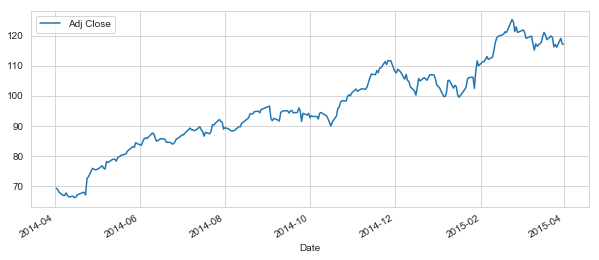

In [11]:
# Let's see a historical view of the closing price
AAPL["Adj Close"].plot(legend=True, figsize=(10,4))

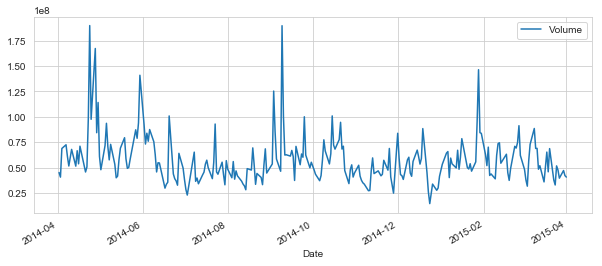

In [12]:
# now let's plot the total volume of the stock being traded each day
AAPL["Volume"].plot(legend=True, figsize=(10,4))

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

For more info on the moving average check out the following links:

1.) http://www.investopedia.com/terms/m/movingaverage.asp

2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [13]:
# pandas has a built-in rolling mean calculator
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" % (str(ma))
    # NOTE: I changed the below code because pandas was returning of the message suggesting using rolling instead
    #        AAPL[column_name] = pd.rolling_mean(AAPL["Adj Close"], ma)
    AAPL[column_name] = AAPL["Adj Close"].rolling(window=ma, center=False).mean()

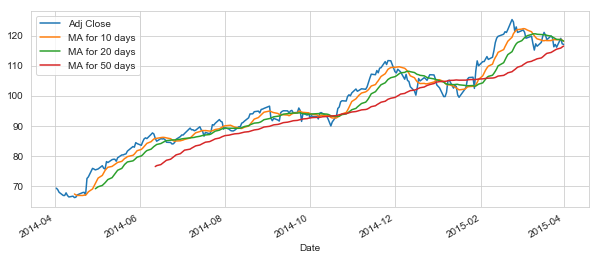

In [14]:
# now let's plot all the additional moving averages
AAPL[["Adj Close", "MA for 10 days", "MA for 20 days", "MA for 50 days"]].plot(subplots=False, figsize=(10,4))

#### Section 2 - Daily Return Analysis

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the Apple stock

In [15]:
# we'll use the pct_change to find the percent change for each day
AAPL["Daily Return"] = AAPL["Adj Close"].pct_change()

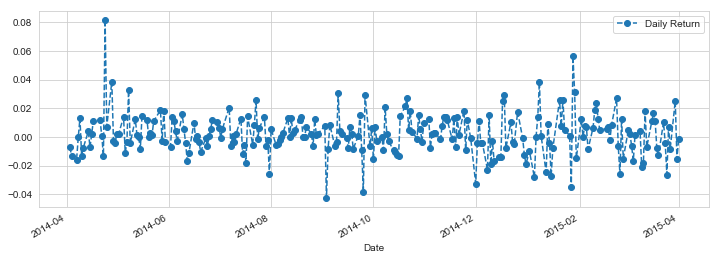

In [16]:
# then we will plot the daily return percentage
AAPL["Daily Return"].plot(figsize=(12,4), legend=True, linestyle="--", marker="o")

Great, now let's get the overall look at the average daily return using a histogram. We'll use seaborn to both a histogram and a kde plot on the same figure

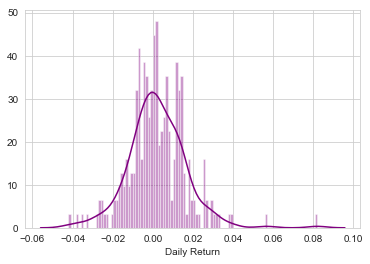

In [17]:
# note the use of dropna here, otherwise the NaN values cannot be read by seaborn
sns.distplot(AAPL["Daily Return"].dropna(), bins=100, color="purple" )

Now, what if we wanted to analyze the returns of all stocks in our list? Let's go ahead and build a DataFrame with all the "Close" columns for each of the stocks dataframes.

In [18]:
# NOTE: The code in this cell is from the original notebook
# Grab all the closing prices for the tech stock list into one DataFrame
# closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [19]:
# NOTE: As I loaded all the stocks data at the beginning, instead of using  the method in the original notebook
#        I now just want to merge the dataframes Ajd Close column.
closing_df = pd.concat([AAPL, AMZN, GOOG, MSFT], keys=["AAPL", "AMZN", "GOOG", "MSFT"])["Adj Close"].unstack().T

In [20]:
# let's take a quick look
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2014-04-02,69.314529,341.959991,563.899353,37.244499
2014-04-03,68.834145,333.619995,566.624390,36.938244
2014-04-04,67.943726,323.000000,540.169861,35.911434
2014-04-07,66.876930,317.760010,535.207153,35.848389
2014-04-08,66.873100,327.070007,551.865540,35.866398


We have all the closing so let's get the daily returns for all the stocks, like it was done for the Apple stock

In [21]:
# make a new dataframe with the returns
tech_rets = closing_df.pct_change()

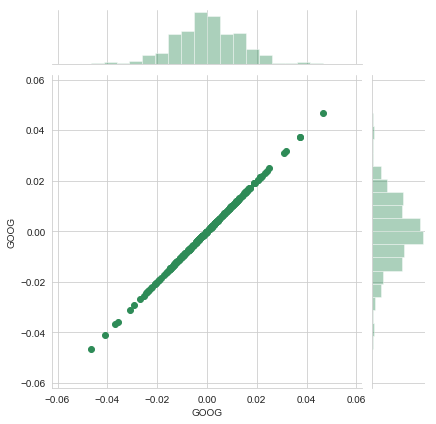

In [22]:
# comparing Google to itself should show a perfectly linear relationship
# NOTE: the latest versions of searborn have removed the capability of showing the pearson value in the graphics. This means that
#        all joinplots in this notebook do not show those as values as the original notebook does.
sns.jointplot("GOOG", "GOOG", tech_rets, kind="scatter", color="seagreen")

In [23]:
# NOTE: As noted above, seaborn does not show the pearson value in the graphic as well as the p value, so we will calculate it and show here.
#        Also, note that we need to drop NAs, otherwise it will return error
s_pearsonr, s_p = stats.pearsonr(tech_rets.GOOG.dropna(), tech_rets.GOOG.dropna())
print("pearsonr = {}, p={}".format(s_pearsonr, s_p))

pearsonr = 1.0, p=0.0


So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. So let's go ahead and compare Google and Microsoft the same way.

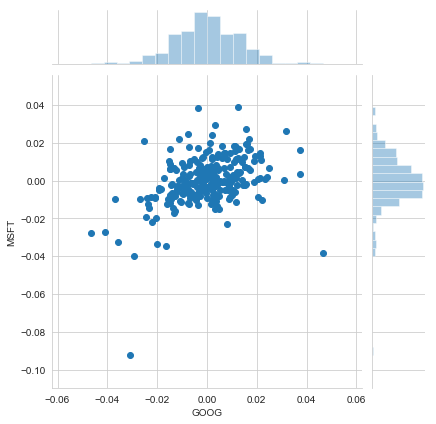

In [24]:
# comparing Google and Microsoft daily returns
sns.jointplot("GOOG", "MSFT", tech_rets, kind="scatter")

In [25]:
# NOTE: As noted above, seaborn does not show the pearson value in the graphic as well as the p value, so we will calculate it and show here.
#        Also, note that we need to drop NAs, otherwise it will return error
s_pearsonr, s_p = stats.pearsonr(tech_rets.GOOG.dropna(), tech_rets.MSFT.dropna())
print("pearsonr = {}, p={}".format(s_pearsonr, s_p))

pearsonr = 0.41961604953399795, p=3.986973313976517e-12


Intersting, the pearsonr value (officially known as the Pearson product-moment correlation coefficient) can give you a sense of how correlated the daily percentage returns are. You can find more information about it at this link:

url - http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient

But for a quick intuitive sense, check out the picture below.

In [26]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

<IPython.core.display.SVG object>

Seaborn and Pandas make it easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker. We can use sns.pairplot to create the plot.

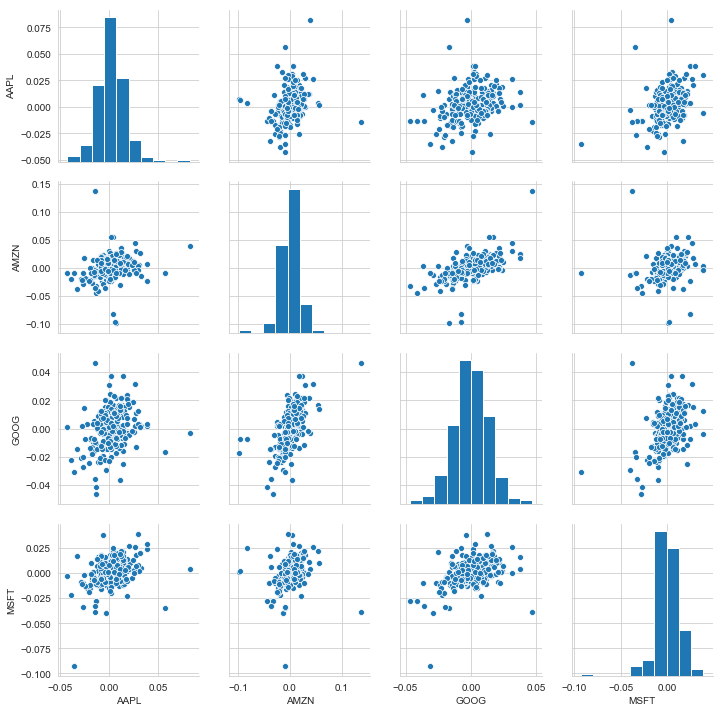

In [27]:
sns.pairplot(tech_rets.dropna())

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

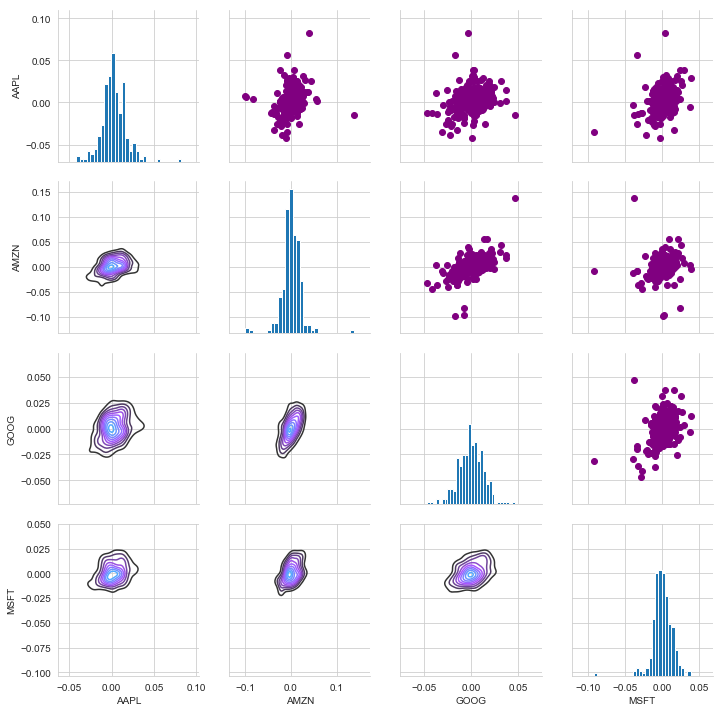

In [28]:
# set up our figure by giving it a name and call PairPlot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# using map_upper we can specify what upper triangle will look like
returns_fig.map_upper(plt.scatter, color = "purple")

# we can also define the lower triangle in the figure, including the plot type (kde) or teh color marp (BluePurple)
returns_fig.map_lower(sns.kdeplot, cmap="cool_d")

# finally, we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist, bins=30)

We could have also analyzed the correlation of the closing prices using this exact same technique. Here it is shown, the code repeated from above with the exception of the DataFrame called.

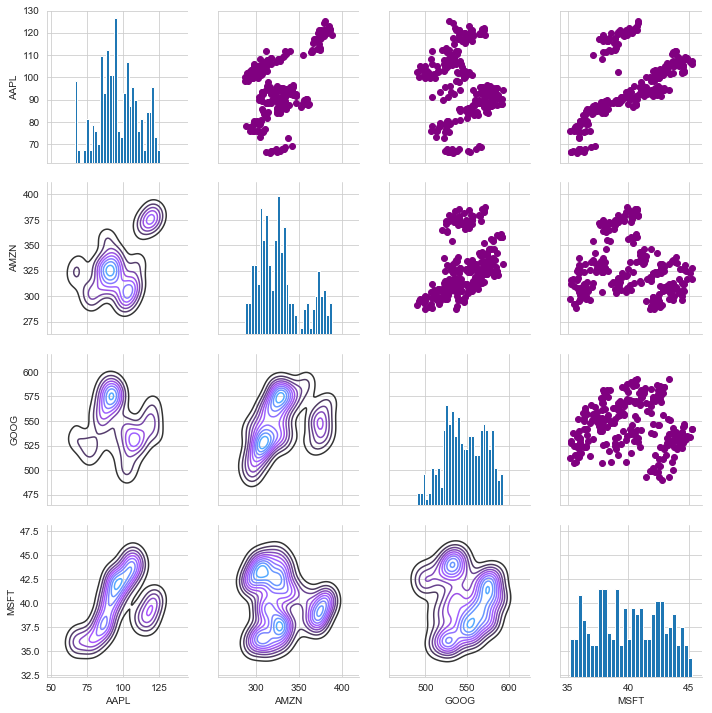

In [29]:
# set up our figure by giving it a name and call PairPlot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# using map_upper we can specify what upper triangle will look like
returns_fig.map_upper(plt.scatter, color = "purple")

# we can also define the lower triangle in the figure, including the plot type (kde) or teh color marp (BluePurple)
returns_fig.map_lower(sns.kdeplot, cmap="cool_d")

# finally, we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist, bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

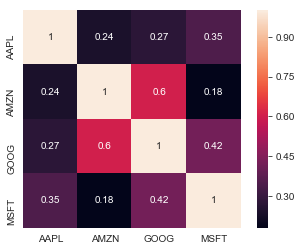

In [30]:
# Let's use seaborn for a quick correlation plot for the daily returns
# NOTE: since the original notebook publication seaborn has deprecated the corrplot method. The alternative is
#        using the heatmap method, which is similar but does not produce the same output as corrplot.
sns.heatmap(tech_rets.dropna().corr(), annot=True, square=True)

In [31]:
# NOTE: just for fun, I tried produce a similar plot of the original notebook. Although the below still is not
#        identical to the original, it's an example of what can be done in seaborn.
#        I used the following example as a guide: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
tech_rets_corr = tech_rets.dropna().corr()
mask_upper = np.zeros_like(tech_rets_corr, dtype=np.bool)
mask_upper[np.triu_indices_from(mask_upper)] = True

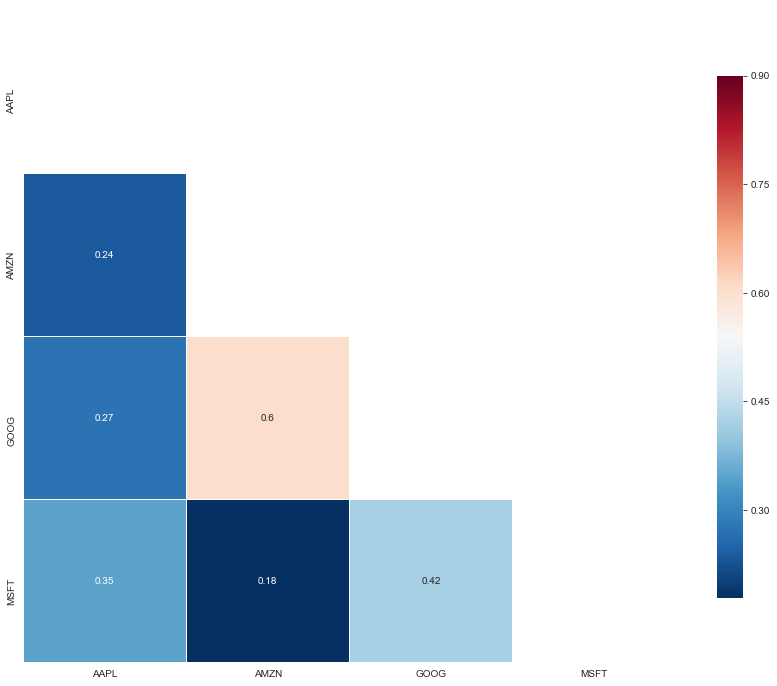

In [32]:
plt.subplots(figsize = (15,12))
sns.heatmap(tech_rets_corr, 
            annot=True,
            mask = mask_upper,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True, cbar_kws={"shrink": .8})

Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Amazon and Google had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

Great! Now that we've done some daily return analysis, let's go ahead and start looking deeper into actual risk analysis.

#### Risk Analysis

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

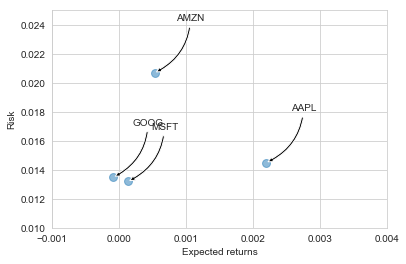

In [33]:
# let's start by defining a new DataFrame as a cleaned version of the original tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi * 20

plt.scatter(rets.mean(), rets.std(), alpha = 0.5, s = area)

# set the x and y limits of the plot (optional, remove this if you don't see anything on your plot)
plt.ylim([0.01, 0.025])
plt.xlim([-0.001, 0.004])

# set the plot axis titles
plt.xlabel("Expected returns")
plt.ylabel("Risk")

# label the scatter plots, for more info on how this is done, check out the link below
# http://matplotlib.org/users/annotations_guide.html
# NOTE: this is a bit different from the original notebook to adjust for the recent version of matplotlib
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = "offset pixels",
        horizontalalignment="right", verticalalignment="bottom",
        arrowprops = dict(facecolor="black", arrowstyle = "simple", connectionstyle = 'arc3,rad=-0.3'))

#### Value at Risk

Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could  expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

#### Value at risk using the "bootstrap" method

For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

Let's go ahead and repeat the daily returns histogram for Apple stock.

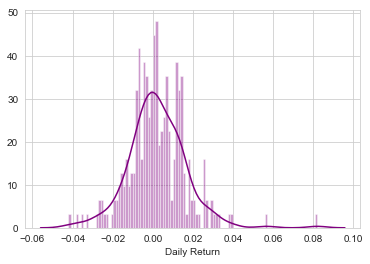

In [34]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL["Daily Return"].dropna(), bins = 100, color="purple")

Now we can use the quantile to get the risk value for the stock

In [35]:
# The 0.05 empirical quantile of daily returns
rets["AAPL"].quantile(0.05)

-0.01901692544903283

The 0.05 empirical quantile of daily returns is at -0.019. That means that with 95% confidence, our worst daily loss will not exceed 1.9%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.019 * 1,000,000 = $19,000.

Go ahead and repeat this for the other stocks in out portfolio, then afterwards we'll look at value at risk by implementing a Monte Carlo method.

#### NOTE: This is additional to the original notebook.
#### Let's go ahead and follow the suggestion to calculate Daily returns for the other stocks

In [36]:
GOOG["Daily Return"] = GOOG["Adj Close"].pct_change()
MSFT["Daily Return"] = MSFT["Adj Close"].pct_change()
AMZN["Daily Return"] = AMZN["Adj Close"].pct_change()

Now, draw for Google, Microsft and Amazon stocks

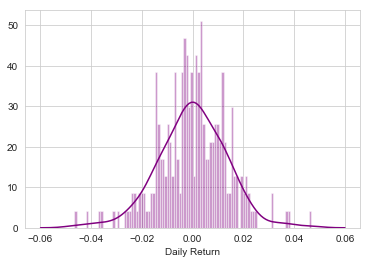

In [37]:
sns.distplot(GOOG["Daily Return"].dropna(), bins = 100, color="purple")

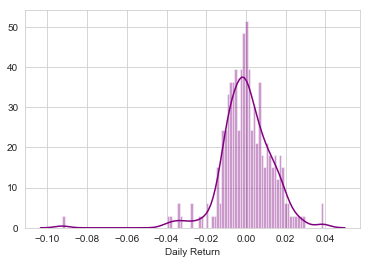

In [38]:
sns.distplot(MSFT["Daily Return"].dropna(), bins = 100, color="purple")

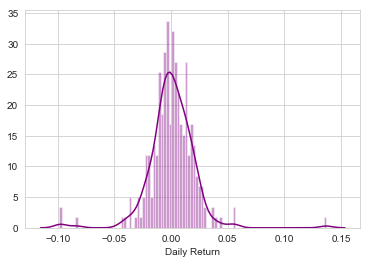

In [39]:
sns.distplot(AMZN["Daily Return"].dropna(), bins = 100, color="purple")

Now, quantiles for Google, Microsft and Amazon stocks

In [40]:
rets["GOOG"].quantile(0.05)

-0.022208392998220472

In [41]:
rets["MSFT"].quantile(0.05)

-0.01665120621634608

In [42]:
rets["AMZN"].quantile(0.05)

-0.026051813180182515

#### Value at Risk using the Monte Carlo method

Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.


The equation for geometric Browninan motion is given by the following equation:

$$\frac{\Delta S}{S} = \mu\Delta t + \sigma \epsilon \sqrt{\Delta t}$$ 

Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

$$ \Delta S = S(\mu\Delta t + \sigma \epsilon \sqrt{\Delta t}) $$ 

Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each tiem period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks, check out the following link:
http://www.investopedia.com/articles/07/montecarlo.asp

To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using the Google DataFrame GOOG

In [43]:
# set up our time horizon
days = 365

# now, our delta
dt = 1/days

# now, let's grab our mu (drift) from the expected return data we got from AAPL
mu = rets.mean()["GOOG"]

# let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()["GOOG"]

Next, we will create a function that takes the starting price and number of days, and uses the sigma and mu calculated above from the daily returns

In [44]:
def stock_monte_carlo(start_price, days, dt, mu, sigma):
    """ This function takes in starting stock price, days of simulation, delta, mu, sigma, and returns a simulated price array """
    
    # define a price array
    price = np.zeros(days)
    price[0] = start_price
    # shock and drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # run the price array for the number of days
    for x in range(1, days):
        # calculate shock
        shock[x] = np.random.normal(loc = mu * dt, scale = sigma * np.sqrt(dt))
        # calculate drift
        drift[x] = mu * dt
        # calculate price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Great, now let's put our function to work!

In [45]:
# NOTE: I just wanted to show the first lines of GOOGLE stock because of the deviation I'll be doing below.
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2014-04-02,596.708984,601.522522,559.115662,563.899353,563.899353,147500,NaN
2014-04-03,566.733765,584.068481,561.045044,566.624390,566.624390,5113100,0.004832
2014-04-04,571.507568,574.610474,540.030640,540.169861,540.169861,6386800,-0.046688
2014-04-07,537.782959,545.480652,524.267273,535.207153,535.207153,4413700,-0.009187
2014-04-08,539.632813,551.965027,538.648193,551.865540,551.865540,3159900,0.031125


Text(0.5,1,'Monte Carlo Analysis for Google')

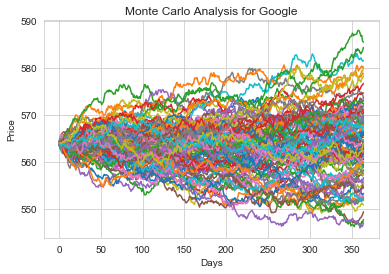

In [46]:
# So, let's get the close of the first day for Google
# NOTE: instead if setting the starting price with a value, which is what the original notebook does, we'll just grab the first "Adj Close" value from the
#        DataFrame, which is a better generalization.
start_price = GOOG["Adj Close"][0]

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, dt, mu, sigma))
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Monte Carlo Analysis for Google")

Let's go ahead and get a histogram of the end results for a much larger run. (note: This could take a little while to run , depending on the number of runs chosen)

In [47]:
# set a latge number of runs
runs = 10000

# create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):
    # set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price, days, dt, mu, sigma)[days-1]

Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use qunatile to define our risk for this stock.

For more info on quantiles, check out this link:
http://en.wikipedia.org/wiki/Quantile

Text(0.5,1,'Final price distribution for Google Stock after 365 days')

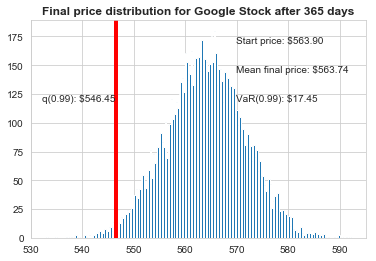

In [48]:
# Now, we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext we can fill in some additional information onto the plot

# Starting price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" % start_price)
# mean ending price
plt.figtext(0.6, 0.7, s="Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% conficence interval)
plt.figtext(0.6, 0.6, s="VaR(0.99): $%.2f" % (start_price - q))

# Display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % (q))

# Plot a line at the 1% quantile result
plt.axvline(x = q, linewidth = 4, color = "r")

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight = "bold")

Awesome! Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, which looks to be $18.38 for every investment of 569.85 (the price of one inital google stock).

This basically menas for every initial stock you purchase your putting about $18.38 at risk 99% of the time from our Monte Carlo Simulation.

Congrats on finishing the Stock Market Data Analysis project! Here are some additional quesitons and excercises for you to do:

1.) Estimate the values at risk using both methods we learned in this project for a stock not related to technology.

2.) Build a practice portfolio and see how well you can predict you risk values with real stock information!

3.) Look further into correlatino of two stocks and see if that gives you any insight into future possible stock prices.

# GREAT JOB!